In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Load dataset

In [2]:
data = pd.read_csv("/content/creditcard.csv.csv")

Preprocessing

In [3]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
print(data.info())
print(data['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

Data Visulization

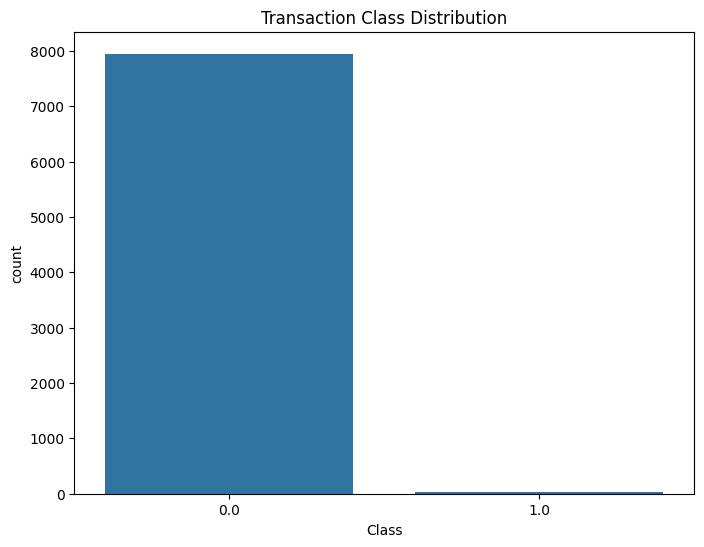

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=data)
plt.title("Transaction Class Distribution")
plt.show()

In [6]:
X = data.drop("Class", axis=1)  # Features (independent variables)
y = data["Class"]

Missing Values

In [7]:
print("Number of missing values in X:", X.isnull().sum().sum())
print("Number of missing values in y:", y.isnull().sum())


Number of missing values in X: 15
Number of missing values in y: 1


In [8]:
data = data.dropna()  # Removes rows with any NaN values


In [9]:
X = data.drop("Class", axis=1)  # Features (independent variables)
y = data["Class"]

In [10]:
X = X.fillna(X.median())  # Imputes missing values in features with the median


In [11]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Assuming 'X' and 'y' are your feature and target variables respectively
# Change n_neighbors to a value less than or equal to the minimum number of samples in any class
smote = SMOTE(random_state=42, k_neighbors=min(y.value_counts()) - 1 if min(y.value_counts()) > 1 else 1)
# If any class has only 1 sample, k_neighbors is set to 1 to avoid errors
X_resampled, y_resampled = smote.fit_resample(X, y)  # Now you can use 'smote'

In [12]:
from sklearn.preprocessing import StandardScaler  # Corrected import statement

# Assuming 'X_resampled' and 'y_resampled' are defined from previous steps

# Scale the resampled features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Now proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled,
                                                    test_size=0.2, random_state=42)

Model Tranning

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make Predictions

In [14]:
y_pred = model.predict(X_test)

Evalute the model

In [15]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1594    0]
 [   0 1585]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1594
         1.0       1.00      1.00      1.00      1585

    accuracy                           1.00      3179
   macro avg       1.00      1.00      1.00      3179
weighted avg       1.00      1.00      1.00      3179



Model Accuraacy

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%
